In [36]:
# python librairies installation
%pip install split-folders matplotlib opencv-python spicy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [37]:
# display, transform, read, split ...
import numpy as np
import cv2 as cv
import os
import splitfolders
import matplotlib.pyplot as plt

import pandas as pd
import os
from IPython.display import display, Image as IPImage

# tensorflow
import tensorflow.keras as keras
import tensorflow as tf

# image processing
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

# model / neural network
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

In [38]:
input_folder = r"C:\Users\AGIF\Documents\VSC\Alp_comvis\Pokemon Images DB\Pokemon Images DB"
output_folder = r"C:\Users\AGIF\Documents\VSC\Alp_comvis\Pokemon Images DB\data-split/"

#Perform the split
splitfolders.ratio(input_folder, 
                   output=output_folder, 
                   seed=1337, 
                   ratio=(0.7, 0.2, 0.1), 
                   group_prefix=None, 
                   move=False)


Copying files: 2374 files [00:06, 360.30 files/s]


Listing directories in base path: "C:\Users\AGIF\Documents\VSC\Alp_comvis\Pokemon Images DB\Pokemon Images DB"
Available directories: ['Abomasnow', 'Abra', 'Absol', 'Accelgor', 'Aegislash (Blade Forme)', 'Aegislash (Shield Forme)', 'Aerodactyl', 'Aggron', 'Aipom', 'Alakazam', 'Alcremie', 'Alolan Diglett', 'Alolan Dugtrio', 'Alolan Exeggutor', 'Alolan Geodude', 'Alolan Golem', 'Alolan Graveler', 'Alolan Grimer', 'Alolan Marowak', 'Alolan Meowth', 'Alolan Muk', 'Alolan Ninetales', 'Alolan Persian', 'Alolan Raichu', 'Alolan Raticate', 'Alolan Rattata', 'Alolan Sandshrew', 'Alolan Sandslash', 'Alolan Vulpix', 'Alomomola', 'Altaria', 'Amaura', 'Ambipom', 'Amoonguss', 'Ampharos', 'Annihilape', 'Anorith', 'Appletun', 'Applin', 'Araquanid', 'Arbok', 'Arboliva', 'Arcanine', 'Arceus', 'Archaludon', 'Archen', 'Archeops', 'Arctibax', 'Arctovish', 'Arctozolt', 'Ariados', 'Armaldo', 'Armarouge', 'Aromatisse', 'Aron', 'Arrokuda', 'Articuno', 'Audino', 'Aurorus', 'Avalugg', 'Axew', 'Azelf', 'Azumarill

,Pokemon,Type,Species,Height,Weight,Abilities,EV Yield,Catch Rate,Base Friendship,Base Exp,...,Defense Max,Special Attack Base,Special Attack Min,Special Attack Max,Special Defense Base,Special Defense Min,Special Defense Max,Speed Base,Speed Min,Speed Max
242,Dialga,"Steel, Dragon",Temporal Pokémon,5.4 m (17′09″),683.0 kg (1505.8 lbs),"1. Pressure, Telepathy (hidden ability)",3 Sp. Atk,"3 (0.4% with PokéBall, full HP)",0 (lower than normal),340,...,372,150,274,438,100,184,328,90,166,306


Looking for images in directory: "C:\Users\AGIF\Documents\VSC\Alp_comvis\Pokemon Images DB\Pokemon Images DB\Dialga"
Found images: ['C:\\Users\\AGIF\\Documents\\VSC\\Alp_comvis\\Pokemon Images DB\\Pokemon Images DB\\Dialga\\Dialga.png', 'C:\\Users\\AGIF\\Documents\\VSC\\Alp_comvis\\Pokemon Images DB\\Pokemon Images DB\\Dialga\\Dialga_new.png']


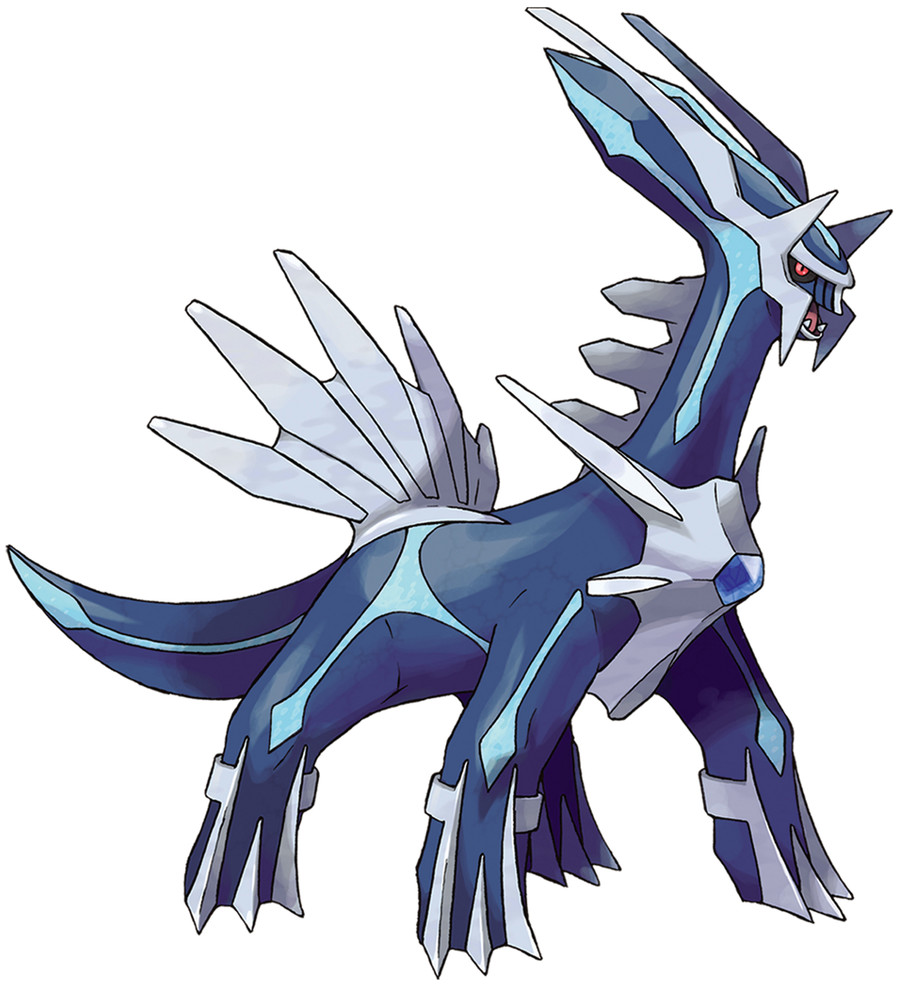

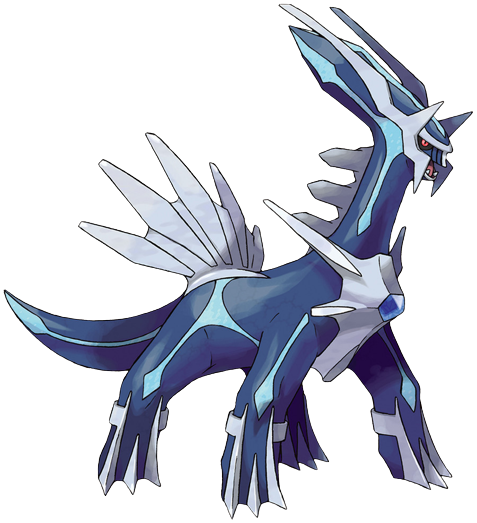

In [39]:
import pandas as pd
import os
from IPython.display import display, Image as IPImage

# Load the CSV file
csv_file_path = 'pokemonDB_dataset.csv'
pokemon_data = pd.read_csv(csv_file_path)

# Normalize and clean text data for consistency
pokemon_data['Pokemon'] = pokemon_data['Pokemon'].str.strip()

# Function to get image paths
def get_image_paths(pokemon_name, base_dir):
    pokemon_dir = os.path.join(base_dir, pokemon_name)
    print(f"Looking for images in directory: \"{pokemon_dir}\"")
    
    if os.path.isdir(pokemon_dir):
        image_files = [os.path.join(pokemon_dir, f) for f in os.listdir(pokemon_dir) if f.endswith(('.png', '.gif'))]
        print(f"Found images: {image_files}")
        return image_files
    else:
        print(f"Directory not found: \"{pokemon_dir}\"")
        return []

# Function to display Pokémon data and images
def display_pokemon_info(pokemon_name, data, image_base_dir):
    pokemon_info = data.loc[data['Pokemon'] == pokemon_name]
    
    if not pokemon_info.empty:
        # Display Pokémon data
        display(pokemon_info)
        
        # Get and display images
        image_paths = get_image_paths(pokemon_name, image_base_dir)
        for img_path in image_paths:
            display(IPImage(filename=img_path))
    else:
        print(f"Pokémon '{pokemon_name}' not found in the dataset.")

# Base directory path for images
image_base_dir = r"C:\Users\AGIF\Documents\VSC\Alp_comvis\Pokemon Images DB\Pokemon Images DB"

# List available directories in the base path
print(f"Listing directories in base path: \"{image_base_dir}\"")
available_directories = os.listdir(image_base_dir)
print(f"Available directories: {available_directories}")

# Example usage
display_pokemon_info('Dialga', pokemon_data, image_base_dir)


#### 3. Create Keras data generators

In [40]:
datagen = ImageDataGenerator()

In [41]:
# define classes name
class_names = available_directories
print(class_names)

['Abomasnow', 'Abra', 'Absol', 'Accelgor', 'Aegislash (Blade Forme)', 'Aegislash (Shield Forme)', 'Aerodactyl', 'Aggron', 'Aipom', 'Alakazam', 'Alcremie', 'Alolan Diglett', 'Alolan Dugtrio', 'Alolan Exeggutor', 'Alolan Geodude', 'Alolan Golem', 'Alolan Graveler', 'Alolan Grimer', 'Alolan Marowak', 'Alolan Meowth', 'Alolan Muk', 'Alolan Ninetales', 'Alolan Persian', 'Alolan Raichu', 'Alolan Raticate', 'Alolan Rattata', 'Alolan Sandshrew', 'Alolan Sandslash', 'Alolan Vulpix', 'Alomomola', 'Altaria', 'Amaura', 'Ambipom', 'Amoonguss', 'Ampharos', 'Annihilape', 'Anorith', 'Appletun', 'Applin', 'Araquanid', 'Arbok', 'Arboliva', 'Arcanine', 'Arceus', 'Archaludon', 'Archen', 'Archeops', 'Arctibax', 'Arctovish', 'Arctozolt', 'Ariados', 'Armaldo', 'Armarouge', 'Aromatisse', 'Aron', 'Arrokuda', 'Articuno', 'Audino', 'Aurorus', 'Avalugg', 'Axew', 'Azelf', 'Azumarill', 'Azurill', 'Bagon', 'Baltoy', 'Banette', 'Barbaracle', 'Barboach', 'Barraskewda', 'Basculegion (Female)', 'Basculegion (Male)', 'Ba

In [42]:
# training data
train_generator = datagen.flow_from_directory( 
    directory=r"C:\Users\AGIF\Documents\VSC\Alp_comvis\Pokemon Images DB\data-split\train",
    classes = class_names,
    target_size=(224, 224),  
    batch_size=32, 
    class_mode="binary", 
)

Found 1187 images belonging to 1187 classes.


In [43]:
# validation data
valid_generator = datagen.flow_from_directory( 
    directory=r"C:\Users\AGIF\Documents\VSC\Alp_comvis\Pokemon Images DB\data-split\val", 
    classes = class_names,
    target_size=(224, 224), 
    batch_size=32, 
    class_mode="binary", 
)

Found 0 images belonging to 1187 classes.


In [44]:
# test data
test_generator = datagen.flow_from_directory( 
    directory=r"C:\Users\AGIF\Documents\VSC\Alp_comvis\Pokemon Images DB\data-split\test", 
    classes = class_names,
    target_size=(224, 224), 
    batch_size=32, 
    class_mode="binary", 
)

Found 1187 images belonging to 1187 classes.


In [45]:
from PIL import Image
import os

def verify_images(directory):
    for filename in os.listdir(directory):
        if filename.endswith(".png") or filename.endswith(".jpg"):
            file_path = os.path.join(directory, filename)
            try:
                img = Image.open(file_path)
                img.verify()  # Verify the file integrity
            except (IOError, SyntaxError) as e:
                print(f"Removing corrupted file: {file_path}")
                os.remove(file_path)

# Verify images in train and validation directories
verify_images(r"C:\Users\AGIF\Documents\VSC\Alp_comvis\Pokemon Images DB\data-split\train")
verify_images(r"C:\Users\AGIF\Documents\VSC\Alp_comvis\Pokemon Images DB\data-split\val")

### Step 3 - Build the model

The first step is to build the model, using **ResNet50**.

In [46]:
# ResNet50 model
resnet_50 = ResNet50(include_top=False, weights='imagenet', input_shape=(224,224,3))
for layer in resnet_50.layers:
    layer.trainable = False

In [47]:
# build the entire model
x = resnet_50.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512, activation='relu')(x) 
x = layers.Dropout(0.5)(x)
x = layers.Dense(256, activation='relu')(x) 
x = layers.Dropout(0.5)(x)
x = layers.Dense(128, activation='relu')(x) 
x = layers.Dropout(0.5)(x)
x = layers.Dense(64, activation='relu')(x) 
x = layers.Dropout(0.5)(x)
predictions = layers.Dense(1187, activation='softmax')(x)
model = Model(inputs = resnet_50.input, outputs = predictions)

### Step 4 - Train the model

**Adam** optimizer is used to train the model over **10 epochs**. It is enough by using Transfer Learning.

The loss is calculated with the **sparse_categorical_crossentropy** function.

In [51]:
# define training function
def trainModel(model, epochs, optimizer):
    batch_size = 32
    model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model.fit(train_generator, validation_data = valid_generator, epochs = epochs, batch_size = batch_size)

> Some warnings can appear, don't be afraid, you can execute the next steps of the notebook.

In [52]:
# launch the training
model_history = trainModel(model = model, epochs = 10, optimizer = "Adam")

Epoch 1/10
38/38 [==============================] - 35s 888ms/step - loss: 7.2804 - accuracy: 0.0000e+00
Epoch 2/10
38/38 [==============================] - 34s 901ms/step - loss: 7.1502 - accuracy: 0.0017
Epoch 3/10
38/38 [==============================] - 33s 872ms/step - loss: 7.1189 - accuracy: 0.0000e+00
Epoch 4/10
38/38 [==============================] - 33s 873ms/step - loss: 7.1114 - accuracy: 0.0000e+00
Epoch 5/10
38/38 [==============================] - 61s 2s/step - loss: 7.1049 - accuracy: 0.0000e+00
Epoch 6/10
38/38 [==============================] - 34s 881ms/step - loss: 7.0984 - accuracy: 8.4246e-04
Epoch 7/10
38/38 [==============================] - 35s 919ms/step - loss: 7.0887 - accuracy: 0.0017
Epoch 8/10
38/38 [==============================] - 36s 947ms/step - loss: 7.0944 - accuracy: 8.4246e-04
Epoch 9/10
38/38 [==============================] - 37s 969ms/step - loss: 7.0992 - accuracy: 0.0000e+00
Epoch 10/10
38/38 [==============================] - 40s 1s/step -

In [53]:
# Print the keys of the history object
print(model_history.history.keys())

# To see the training and validation metrics
train_acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']
train_loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

print(f"Training accuracy: {train_acc}")
print(f"Validation accuracy: {val_acc}")
print(f"Training loss: {train_loss}")
print(f"Validation loss: {val_loss}")


dict_keys(['loss', 'accuracy'])


KeyError: 'val_accuracy'

- Display **loss** curves:

In [ ]:
loss_train_curve = model_history.history["loss"]
loss_val_curve = model_history.history["val_loss"]
plt.plot(loss_train_curve, label = "Train")
plt.plot(loss_val_curve, label = "Validation")
plt.legend(loc = 'upper right')
plt.title("Loss")
plt.show()

KeyError: 'val_loss'

- Display **accuracy** curves:

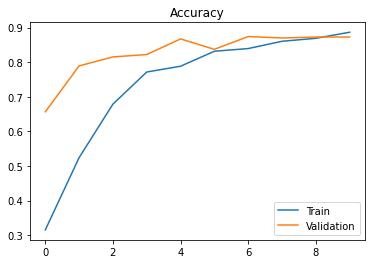

In [ ]:
acc_train_curve = model_history.history["accuracy"]
acc_val_curve = model_history.history["val_accuracy"]
plt.plot(acc_train_curve, label = "Train")
plt.plot(acc_val_curve, label = "Validation")
plt.legend(loc = 'lower right')
plt.title("Accuracy")
plt.show()

### Step 5 - Evaluate the model

The model is evaluated on test data.

In [ ]:
test_loss, test_acc = model.evaluate(test_generator)
print("The test loss is: ", test_loss)
print("The best accuracy is: ", test_acc*100)

12/12 [==============================] - 1s 104ms/step - loss: 0.3605 - accuracy: 0.8871
The test loss is:  0.3604503870010376
The best accuracy is:  88.70967626571655


### Step 6 - Test the model on a new image

To test your model and predict which classes new images belong to, you can import sounds into a /workspace/data_test folder.

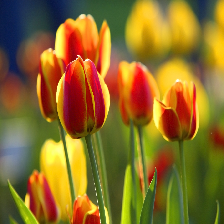

In [ ]:
img = tf.keras.preprocessing.image.load_img('/workspace/tulipe-test.jpeg', target_size=(224, 224))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = np.array([img_array]) 
img

In [ ]:
# generate predictions for samples
predictions = model.predict(img_array)
print(predictions)

[[6.955235e-11 6.567980e-13 6.372071e-07 9.004074e-11 9.999994e-01]]


In [ ]:
# generate argmax for predictions
class_id = np.argmax(predictions, axis = 1)
print(class_id)

[4]


In [ ]:
# transform classes number into classes name
class_names[class_id.item()]

'tulips'

### Step 7 - Save and export the model

>To save your model, you should create an other Object Storage container (with write rights) and mount it in your workspace (`saved_model` in this example).

You can now save your model in a dedicated folder.

In [ ]:
model.save('/workspace/saved_model/my_model')

2022-06-01 12:48:50.987154: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: /workspace/saved_model/my_model/assets


In [ ]:
# my_model directory
%ls /workspace/saved_model/

my_model/


In [ ]:
# contains an assets folder, saved_model.pb, and variables folder
%ls /workspace/saved_model/my_model

assets/  keras_metadata.pb  saved_model.pb  variables/


In [ ]:
model = tf.keras.models.load_model('/workspace/saved_model/my_model')
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

## Conclusion

**Transfer Learning** saves time by achieving better performance in fewer epochs. 

Train and test this model on your own dataset !